In [ ]:
from google.colab import drive
 
# Mount folder drive (Google Drive)
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Library**

Import semua library yang akan digunakan seperti numpy, matplotlib, pandas, seaborn, dan sklearn.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

**Kita memasukan dataset dan mendelete kolom yg tidak perlu pada excelnya seperti timestamp**

Data yang digunakan adalah primary data (hasil dari pengisian kuisioner yang telah disebar menggunakan google forms)

In [ ]:
dir = "/content/drive/MyDrive/Colab Notebooks/Survey Data Science (Responses).xlsx"
dataset = pd.read_excel(dir)
del dataset['Timestamp']

Kita mengecek apakah ada data yang kembar (kedobelan ngisi saat survey/tidak). Jika terdapat nilai "True" berarti data tersebut duplicate.

In [ ]:
dataset.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49     True
50    False
51    False
52    False
53     True
dtype: bool

**Mengdrop data yang kembar**

ada dua data yang duplicate, yaitu data ke 49 dan 53, sehingga kita drop

In [ ]:
dataset = dataset.drop([dataset.index[49], dataset.index[53]])
dataset.tail()

,Nama,Jurusan,Angkatan,IPK,Kepribadian,Lokasi,Is_ikut_kepanitiaan,Pernah_osis,Have_teman_SU,Ikut_su
47,ted,IMT,2018,3.5 - 4,Introvert,"Luar Surabaya (cth: Sidoarjo,Gresik,dll.)",Tidak,Tidak,Tidak,Tidak
48,David Christian,IMT,2020,Belum ada IPK,Introvert,Surabaya Timur,Ya,Tidak,Tidak,Tidak
50,Natasya Dahliana Lulu,IMT,2018,3.5 - 4,Introvert,Surabaya Barat,Ya,Ya,Ya,Tidak
51,Max,IMT,2020,Belum ada IPK,Introvert,Surabaya Barat,Ya,Tidak,Tidak,Ya
52,Kezia Yovita Chandra,ISB,2018,3.5 - 4,Introvert,Surabaya Barat,Ya,Tidak,Ya,Tidak


**Label encoding**

data yang masih berupa kata kita ubah menjadi angka/numerik agar dapat digunakan dalam perhitungan

In [ ]:
jurusan_map = {'IMT': 1, 'ISB': 2}
dataset['Jurusan'] = dataset['Jurusan'].map(jurusan_map)
 
angkatan_map = {2018: 1, 2019: 2, 2020:3}
dataset['Angkatan'] = dataset['Angkatan'].map(angkatan_map)
 
ipk_map = {'0 - 1.5': 1, '1.5 - 2': 2, '2 - 2.5':3, '2.5 - 3':4, '3 - 3.5':5, '3.5 - 4':6, 'Belum ada IPK':0}
dataset['IPK'] = dataset['IPK'].map(ipk_map)
 
kepribadian_map = {'Introvert': 1, 'Extrovert': 2}
dataset['Kepribadian'] = dataset['Kepribadian'].map(kepribadian_map)
 
lokasi_map = {'Surabaya Pusat': 1, 'Surabaya Timur': 2, 'Surabaya Selatan':3, 'Surabaya Barat':4, 'Surabaya Utara':5, 'Luar Surabaya (cth: Sidoarjo,Gresik,dll.)':0}
dataset['Lokasi'] = dataset['Lokasi'].map(lokasi_map)
 
kepanitiaan_map = {'Tidak': 1, 'Ya': 0}
dataset['Is_ikut_kepanitiaan'] = dataset['Is_ikut_kepanitiaan'].map(kepanitiaan_map)
 
osis_map = {'Tidak': 1, 'Ya': 0}
dataset['Pernah_osis'] = dataset['Pernah_osis'].map(osis_map)
 
teman_map = {'Tidak': 1, 'Ya': 0}
dataset['Have_teman_SU'] = dataset['Have_teman_SU'].map(teman_map)
 
ikut_map = {'Tidak': 1, 'Ya': 0}
dataset['Ikut_su'] = dataset['Ikut_su'].map(ikut_map)

#print data untuk melihat hasil encoding
dataset.head()

,Nama,Jurusan,Angkatan,IPK,Kepribadian,Lokasi,Is_ikut_kepanitiaan,Pernah_osis,Have_teman_SU,Ikut_su
0,Catharina Adinda Mega Cahyani,2,2,6,1,4,0,1,0,1
1,Eillen,2,2,6,1,4,0,1,0,1
2,Nicky Santano,1,2,6,2,4,0,1,0,1
3,Hanjaya,2,2,5,2,4,1,0,0,1
4,Bryan Antonnio,1,2,6,2,2,0,0,0,0


**Mendelete kolom yang tidak perlu lagi**

kolom nama telah selesai digunakan untuk pengecekan data duplikat dan sekarang tidak digunakan lagi sehingga kita delete

In [ ]:
del dataset['Nama']

 Untuk mengetahui data kita jadinya berapa baris dan kolomnya. Total atributenya ada 9, jumlah datanya ada 52 (dari responden kuisionernya)

In [ ]:
#jumlah baris dan kolom
dataset.shape

(52, 9)

Memastikan tidak ada data yang kosong / null

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 52
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Jurusan              52 non-null     int64
 1   Angkatan             52 non-null     int64
 2   IPK                  52 non-null     int64
 3   Kepribadian          52 non-null     int64
 4   Lokasi               52 non-null     int64
 5   Is_ikut_kepanitiaan  52 non-null     int64
 6   Pernah_osis          52 non-null     int64
 7   Have_teman_SU        52 non-null     int64
 8   Ikut_su              52 non-null     int64
dtypes: int64(9)
memory usage: 4.1 KB


**Descriptive Analysis**

Melihat analisis central tendency nya seperti standard deviation, mean, median, dll

In [ ]:
dataset.describe()

,Jurusan,Angkatan,IPK,Kepribadian,Lokasi,Is_ikut_kepanitiaan,Pernah_osis,Have_teman_SU,Ikut_su
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,1.384615,2.096154,4.019231,1.326923,2.942308,0.326923,0.653846,0.307692,0.634615
std,0.491251,0.747797,2.740333,0.473665,1.589345,0.473665,0.480384,0.466041,0.486236
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,6.000000,1.000000,4.000000,0.000000,1.000000,0.000000,1.000000
75%,2.000000,3.000000,6.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000
max,2.000000,3.000000,6.000000,2.000000,5.000000,1.000000,1.000000,1.000000,1.000000


**Membuat heatmap**

korelasi paling tinggi ada di attribute angkatan dan have_teman_su (korelasi positif) dan pada IPK dan have_teman_su (korelasi negatif)

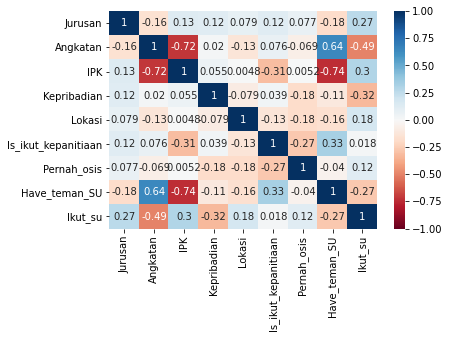

In [ ]:
dcorr=dataset.corr()
sns.heatmap(dcorr,annot=True,center=0,cmap="RdBu",vmin=-1,vmax=1)

**Menghitung variance**

In [ ]:
dataset.var()

Jurusan                0.241327
Angkatan               0.559201
IPK                    7.509427
Kepribadian            0.224359
Lokasi                 2.526018
Is_ikut_kepanitiaan    0.224359
Pernah_osis            0.230769
Have_teman_SU          0.217195
Ikut_su                0.236425
dtype: float64

**Perbandingan target value, ikut SU dan tidak ikut SU**

Dihitung dan dibuat visualisasi menggunakan bar chart untuk memudahkan melihat perbandingannya

Target Variable
1    33
0    19
Name: Ikut_su, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


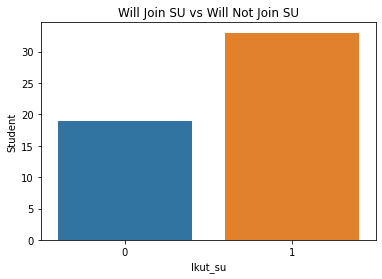

In [ ]:
# Join SU Count
print('Target Variable')
print(dataset['Ikut_su'].value_counts())

# Target Variable Countplot
sns.countplot(dataset['Ikut_su'])
plt.title('Will Join SU vs Will Not Join SU')
plt.ylabel('Student')
plt.show()


 **Visualisasi per attribute nya (jurusan, angkatan, dll)**

 Dihitung dan dibuat visualisasi menggunakan bar chart untuk memudahkan melihat perbandingan jumlah masing-masing data dari setiap atribut

1    32
2    20
Name: Jurusan, dtype: int64
--------------
2    23
3    17
1    12
Name: Angkatan, dtype: int64
--------------
6    31
0    16
5     3
4     2
Name: IPK, dtype: int64
--------------
1    35
2    17
Name: Kepribadian, dtype: int64
--------------
4    32
0     8
2     5
1     4
3     2
5     1
Name: Lokasi, dtype: int64
--------------
0    35
1    17
Name: Is_ikut_kepanitiaan, dtype: int64
--------------
1    34
0    18
Name: Pernah_osis, dtype: int64
--------------
0    36
1    16
Name: Have_teman_SU, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


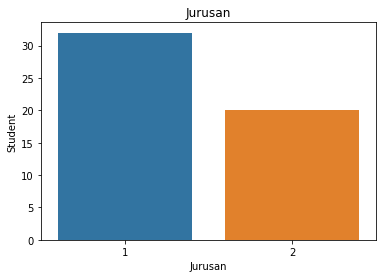

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


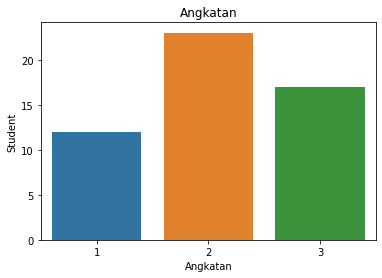

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


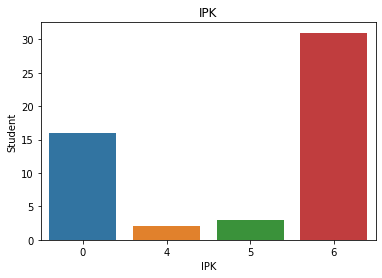

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


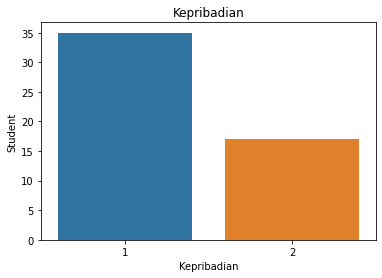

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


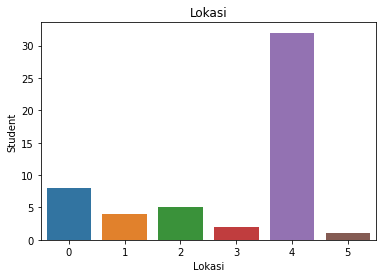

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


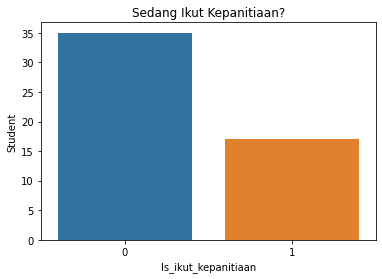

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


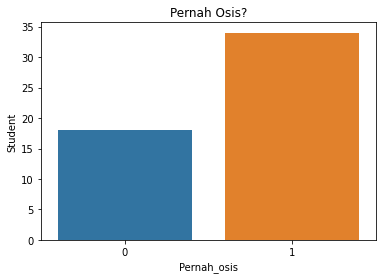

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


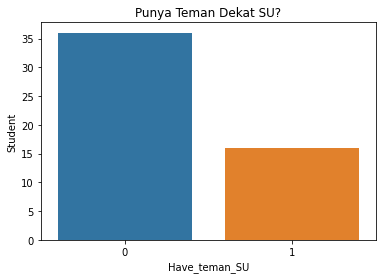

In [ ]:
#melihat jumlah dari masing-masing data setiap atribut

print(dataset['Jurusan'].value_counts())
print("--------------")
print(dataset['Angkatan'].value_counts())
print("--------------")
print(dataset['IPK'].value_counts())
print("--------------")
print(dataset['Kepribadian'].value_counts())
print("--------------")
print(dataset['Lokasi'].value_counts())
print("--------------")
print(dataset['Is_ikut_kepanitiaan'].value_counts())
print("--------------")
print(dataset['Pernah_osis'].value_counts())
print("--------------")
print(dataset['Have_teman_SU'].value_counts())

#visualisasi

sns.countplot(dataset['Jurusan'])
plt.title('Jurusan')
plt.ylabel('Student')
plt.show()

sns.countplot(dataset['Angkatan'])
plt.title('Angkatan')
plt.ylabel('Student')
plt.show()

sns.countplot(dataset['IPK'])
plt.title('IPK')
plt.ylabel('Student')
plt.show()

sns.countplot(dataset['Kepribadian'])
plt.title('Kepribadian')
plt.ylabel('Student')
plt.show()

sns.countplot(dataset['Lokasi'])
plt.title('Lokasi')
plt.ylabel('Student')
plt.show()

sns.countplot(dataset['Is_ikut_kepanitiaan'])
plt.title('Sedang Ikut Kepanitiaan?')
plt.ylabel('Student')
plt.show()

sns.countplot(dataset['Pernah_osis'])
plt.title('Pernah Osis?')
plt.ylabel('Student')
plt.show()

sns.countplot(dataset['Have_teman_SU'])
plt.title('Punya Teman Dekat SU?')
plt.ylabel('Student')
plt.show()



Untuk memperjelas bagaimana setiap atribut berpengaruh terhadap target, kita buat visualisasi bar plot dari setiap atribut dan dibagi berdasarkan data target akan ikut SU atau tidak ikut SU (kolom "ikut_su")

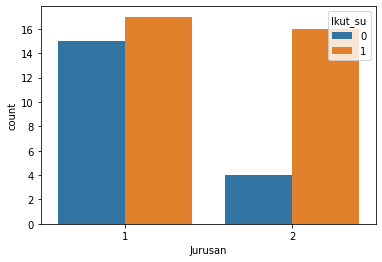

In [ ]:
ax = sns.countplot(x="Jurusan", hue="Ikut_su", data=dataset)

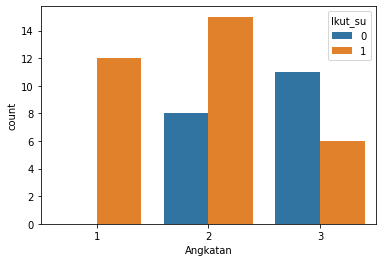

In [ ]:
ax = sns.countplot(x="Angkatan", hue="Ikut_su", data=dataset)

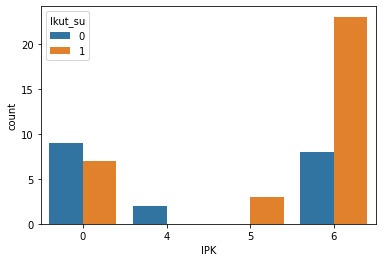

In [ ]:
ax = sns.countplot(x="IPK", hue="Ikut_su", data=dataset)

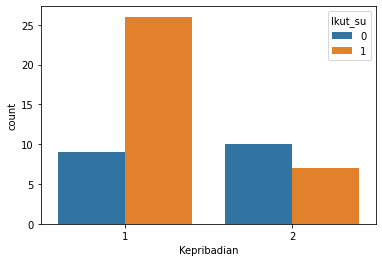

In [ ]:
ax = sns.countplot(x="Kepribadian", hue="Ikut_su", data=dataset)

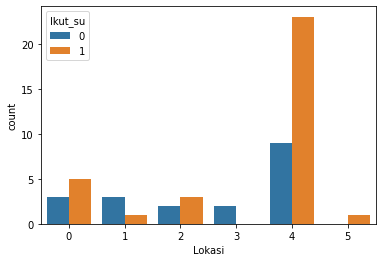

In [ ]:
ax = sns.countplot(x="Lokasi", hue="Ikut_su", data=dataset)

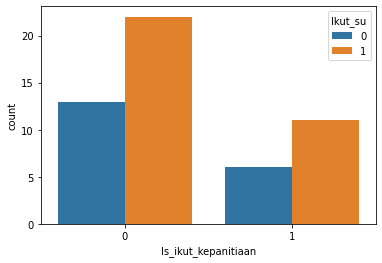

In [ ]:
ax = sns.countplot(x="Is_ikut_kepanitiaan", hue="Ikut_su", data=dataset)

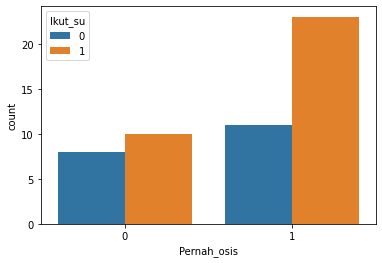

In [ ]:
ax = sns.countplot(x="Pernah_osis", hue="Ikut_su", data=dataset)

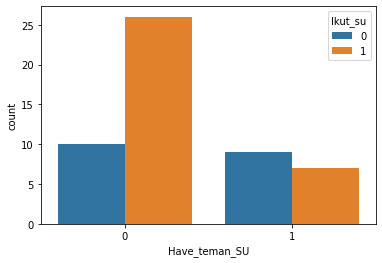

In [ ]:
ax = sns.countplot(x="Have_teman_SU", hue="Ikut_su", data=dataset)

**CLASSIFICATION**

Metode yang digunakan adalah Naive Bayes Classifier yang merupakan metode klasifikasi dengan probabilitas dan statistik. Pembuatan model dibantu dengan libary scikit learn CategoricalNB yang dikhususkan untuk Naive Bayes bagi data yang categorical.

**Data dibagi berdasarkan variabel independen dan variabel dependen**

Variabel independen adalah variabel yang mempengaruhi terjadinya variabel dependen, sedangkan variabel dependen adalah variabel yang hendak kita prediksi.

In [ ]:
# X adalah variabel independen (kolom jurusan, angkatan, IPK, kepribadian, lokasi, is_ikut_kepanitiaan, pernah_osis, have_teman_SU)
X = dataset.iloc[:, :-1].values

# y adalah variabel dependen (kolom ikut_SU) 
y = dataset.iloc[:, -1].values


#categorical data tidak perlu di normalisasi

**Split dataset menjadi data Training dan data Test**

Data dibagi menjadi 84% data training dan 16% data testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.16, random_state = 0)

**Membuat model persamaan Naive Bayes berdasarkan data Training**

In [ ]:
clf = CategoricalNB()
clf.fit(X_train, y_train)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

**Uji hasil prediksi dengan data Test**

In [ ]:
y_pred = clf.predict(X_test)
print(y_pred)

[1 0 1 0 1 0 0 1 1]


**Mengukur skor akurasi dari model persamaan Naive Bayes Classifier**

mencari nilai confusion matrix, yaitu true positive, true negative, false positive, false negative untuk perhitungan accuracy, precision,dan recall.

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  2
False Positives:  1
False Negatives:  2
True Positives:  4


Akurasi dihitung dari berapa hasil prediksi yang benar. Sehingga kita hitung menggunakan nilai true positive dan true negative dibagi total prediksi.


In [ ]:
#Accuracy

Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%:".format(Accuracy))

Accuracy 66.67%:


Selain melihat nilai akurasi, pada kasus ini, kita perlu lebih memperhatikan nilai precision juga. Karena jika kita  memprediksi mahasiswa tidak ikut SU, padahal kenyataannya ikut SU (false negative) tidak akan menjadi masalah karena semakin banyak yang ikut SU semakin baik. Namun, jika kita memprediksi mahasiswa akan ikut SU, padahal kenyataannya tidak ikut SU (false positive), maka bisa mengakibatkan berbagai hal seperti contoh SU kekurangan anggota, sehingga juga susah mencari regenerasi berikutnya untuk bergabung dalam organisasi. Bisa jadi karena mahasiswa ada yang lebih tertarik untuk ikut panitia UKM/organisasi lain di luar kampus.

precision dihitung dari perbandingan antara true positive dengan banyaknya data yang diprediksi positif

In [ ]:
#Precision 

Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

Precision 0.80


recall dihitung dari perbandingan antara true positive dengan banyaknya data yang sebenarnya positif

In [ ]:
#Recall 

Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))

Recall 0.67


F1 scorenya dihitung dari hasil precision dan recall. Jika bernilai mendekati 1 maka model klasifikasi kita memiliki precision dan recall yang baik.

In [ ]:
#F1 Score

f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.2f}".format(f1))

F1 Score 0.73
